# Import packages and functions

In [1]:
import sys
# force the notebook to look for files in the upper level directory
sys.path.insert(1, '../')

In [2]:
import shap
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from model.model_building import load_data

# Set up constants

In [3]:
MIT_MODEL_REDUCED_PATH = "../model/saved_models/new_models/mit_reduced.model"
REDUCED_PATH = "../data/processed/IMT_Classification_Dataset_Reduced_Feature_Set_v9.xlsx"
SAVE_PLOT = True

# Read in the data & model

In [4]:
# load the reduced feature set
df_reduced = pd.read_excel(REDUCED_PATH)
# load the mit vs. non_mit classifier
mit_model = xgb.XGBClassifier()
mit_model.load_model(MIT_MODEL_REDUCED_PATH)

# SHAP feature importance for MIT vs. non-MIT classifier trained on reduced feature set

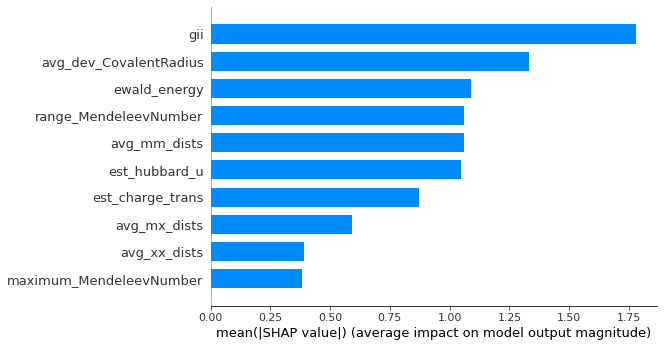

In [5]:
# load in the data
x, _ = load_data(df_reduced, "MIT")
# load the shap tree explainer
explainer = shap.TreeExplainer(mit_model)
# get the shap values
shap_values = explainer.shap_values(x)
# display the feature importance bar plot
shap.summary_plot(shap_values, x, plot_type="bar", max_display=10, show=False)
if SAVE_PLOT: plt.savefig("../plots/MIT_top_10_features_reduced.pdf", dpi=300, bbox_inches="tight")

In [6]:
x

,gii,est_hubbard_u,est_charge_trans,ewald_energy,maximum_MendeleevNumber,range_MendeleevNumber,avg_dev_CovalentRadius,avg_mm_dists,avg_mx_dists,avg_xx_dists
0,0.321007,10.523409,11.946426,-176.437492,87,78,56.880000,4.040770,2.020385,2.857256
1,0.195702,12.893512,21.595766,-147.211145,88,79,38.875000,3.491120,2.331183,3.654519
2,0.817185,8.412244,3.591515,-1467.306977,87,78,54.480000,2.577001,2.105553,2.978994
3,0.277386,10.043255,11.876142,-3513.136461,87,31,37.487603,3.639266,1.938742,3.077187
4,0.117212,10.277936,8.827434,-1622.921776,87,80,47.638889,3.868727,1.992857,2.933553
...,...,...,...,...,...,...,...,...,...,...
223,0.198242,58.592940,-12.467020,-1960.406861,87,41,37.595568,3.387826,1.938791,2.767633
224,0.296188,13.875184,11.940681,-2059.225054,87,41,39.470699,3.269840,1.952518,2.819850
225,0.128538,14.484546,9.779242,-286.687545,87,41,38.666667,3.522330,1.927294,2.675472
226,0.231001,15.898371,10.393278,-684.047861,87,75,43.680000,3.755161,1.963601,2.827539


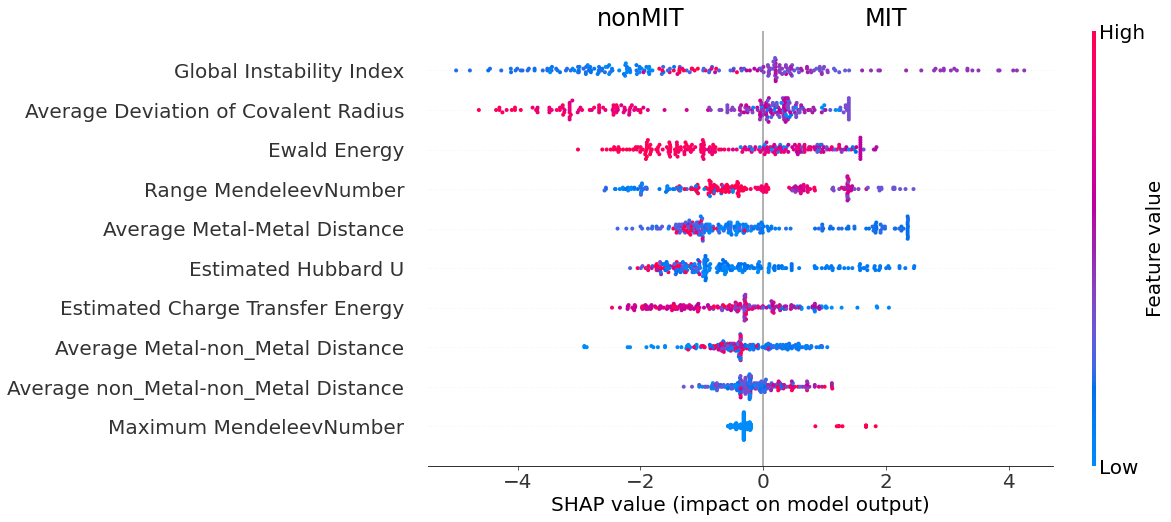

In [7]:
shap.summary_plot(shap_values, x, max_display=10, plot_type="dot", plot_size=(14, 8), show=False,
                  feature_names=["Global Instability Index", 
                                 "Estimated Hubbard U",
                                 "Estimated Charge Transfer Energy",
                                 "Ewald Energy", 
                                 "Maximum MendeleevNumber",
                                 "Range MendeleevNumber", 
                                 "Average Deviation of Covalent Radius", 
                                 "Average Metal-Metal Distance", 
                                 "Average Metal-non_Metal Distance", 
                                 "Average non_Metal-non_Metal Distance"
                                 ])
ax = plt.gca()
fig = plt.gcf()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label, 
              fig.axes[1].get_children()[8].get_children()[0],
              fig.axes[1].get_children()[8].get_children()[-2].get_children()[-1],
              fig.axes[1].get_children()[8].get_children()[-1].get_children()[-1]] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
ax.annotate("nonMIT", xy=(-2, 10), ha="center", va="bottom", fontsize=24)
ax.annotate("MIT", xy=(2, 10), ha="center", va="bottom", fontsize=24)
if SAVE_PLOT: ax.figure.savefig("../plots/mit_classifier_reduced_shap_dot.pdf", dpi=300, bbox_inches="tight")

In [8]:
NdNiO3 = df_reduced.loc[df_reduced.Compound == "NdNiO3"]
NdNiO3_index = NdNiO3.index.to_list()[0]
NdNiO3

,Compound,Label,struct_file_path,gii,est_hubbard_u,est_charge_trans,ewald_energy,maximum_MendeleevNumber,range_MendeleevNumber,avg_dev_CovalentRadius,avg_mm_dists,avg_mx_dists,avg_xx_dists
200,NdNiO3,2,../data/Structures/MIT_materials/HighT/NdNiO3_...,0.342999,15.94851,10.55672,-676.445362,87,68,46.32,3.804911,1.942537,2.853433


In [9]:
x.round(2).iloc[NdNiO3_index]

gii                          0.34
est_hubbard_u               15.95
est_charge_trans            10.56
ewald_energy              -676.45
maximum_MendeleevNumber     87.00
range_MendeleevNumber       68.00
avg_dev_CovalentRadius      46.32
avg_mm_dists                 3.80
avg_mx_dists                 1.94
avg_xx_dists                 2.85
Name: 200, dtype: float64

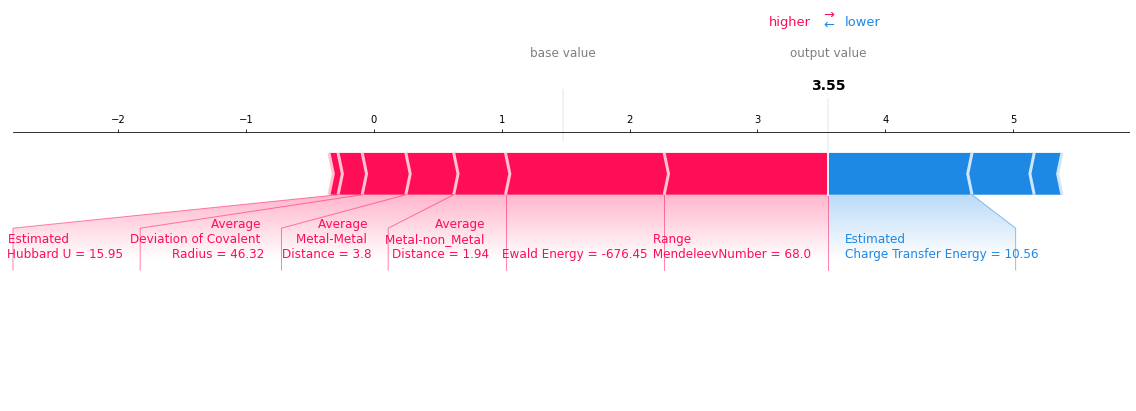

In [10]:
ind = NdNiO3_index
NdNiO3_shap = shap.force_plot(
    explainer.expected_value, 
    shap_values[ind], 
    x.round(2).iloc[ind], 
    matplotlib=True, 
    show=False,
    out_names="output value",
    figsize=(20, 5),
    feature_names=["Global Instability Index", 
                   "Estimated              \nHubbard U",
                   "Estimated\nCharge Transfer Energy",
                   "Ewald Energy", 
                   "Maximum MendeleevNumber",
                   "Range                               \n MendeleevNumber", 
                   "Average \nDeviation of Covalent \nRadius", 
                   "Average \nMetal-Metal \nDistance", 
                   "Average \nMetal-non_Metal \nDistance", 
                   "Average \nnon_Metal-non_Metal \nDistance"
                  ]
    )

if SAVE_PLOT: NdNiO3_shap.savefig("../plots/NdNiO3_shap.pdf", dpi=300, bbox_inches="tight")

In [11]:
LuNiO3 = df_reduced.loc[df_reduced.Compound == "LuNiO3"]
LuNiO3_index = LuNiO3.index.to_list()[0]
LuNiO3

,Compound,Label,struct_file_path,gii,est_hubbard_u,est_charge_trans,ewald_energy,maximum_MendeleevNumber,range_MendeleevNumber,avg_dev_CovalentRadius,avg_mm_dists,avg_mx_dists,avg_xx_dists
193,LuNiO3,2,../data/Structures/MIT_materials/HighT/LuNiO3_...,0.244159,15.86419,10.445842,-689.21656,87,46,42.96,3.721985,1.962367,2.811248


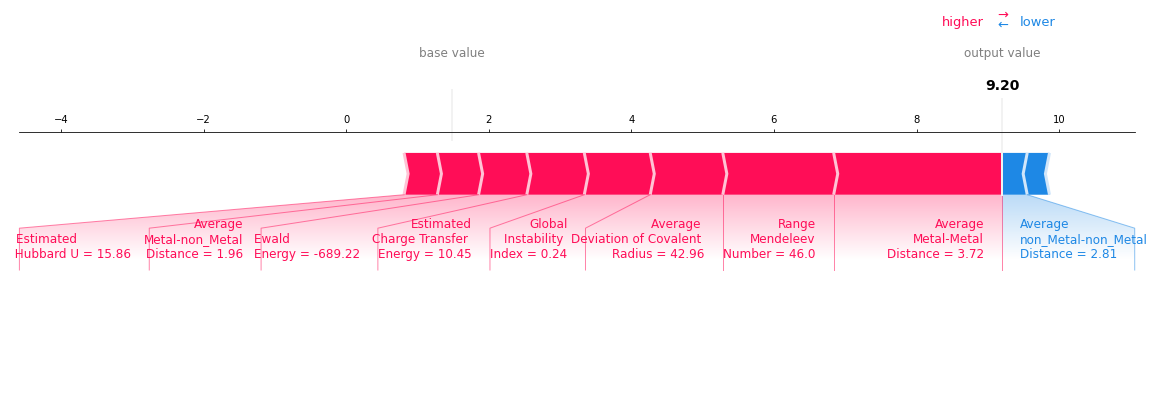

In [12]:
ind = LuNiO3_index
LuNiO3_shap = shap.force_plot(
    explainer.expected_value, 
    shap_values[ind], 
    x.round(2).iloc[ind], 
    matplotlib=True, 
    show=False,
    out_names="output value",
    figsize=(20, 5),
    feature_names=["Global\nInstability \nIndex", 
                   "Estimated              \n  Hubbard U",
                   "Estimated\nCharge Transfer \nEnergy",
                   "Ewald                  \nEnergy", 
                   "Maximum MendeleevNumber",
                   "Range\nMendeleev\nNumber", 
                   "Average \nDeviation of Covalent \nRadius", 
                   "Average\nMetal-Metal\nDistance", 
                   "Average\nMetal-non_Metal\nDistance", 
                   "Average\nnon_Metal-non_Metal\nDistance"
                  ]
    )

if SAVE_PLOT: LuNiO3_shap.savefig("../plots/LuNiO3_shap.pdf", dpi=300, bbox_inches="tight")